In [1]:
from compute_epv import *
from xgboost import plot_importance

In [2]:
X = pd.read_parquet('X_epv.parquet')
Y = pd.read_parquet('Y_epv.parquet')
Y_pred = pd.DataFrame()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [4]:
brier_score_loss(Y_test['scores'], [0] * len(Y_test['scores']))

0.009907811995778714

In [5]:
model_scores = XGBClassifier(obj=brier_obj_sklearn, verbosity=1, disable_default_eval_metric=1)
model_scores.fit(X_train, Y_train['scores'],
                 eval_metric=brier_score_sklearn,
                 eval_set=[(X_train, Y_train['scores']), (X_test, Y_test['scores'])],
                 verbose=True)

[0]	validation_0-brier-error:0.13002	validation_1-brier-error:0.13006
[1]	validation_0-brier-error:0.07228	validation_1-brier-error:0.07234
[2]	validation_0-brier-error:0.04266	validation_1-brier-error:0.04274
[3]	validation_0-brier-error:0.02706	validation_1-brier-error:0.02716
[4]	validation_0-brier-error:0.01873	validation_1-brier-error:0.01884
[5]	validation_0-brier-error:0.01425	validation_1-brier-error:0.01438
[6]	validation_0-brier-error:0.01182	validation_1-brier-error:0.01197
[7]	validation_0-brier-error:0.01050	validation_1-brier-error:0.01065
[8]	validation_0-brier-error:0.00978	validation_1-brier-error:0.00994
[9]	validation_0-brier-error:0.00939	validation_1-brier-error:0.00955
[10]	validation_0-brier-error:0.00918	validation_1-brier-error:0.00934
[11]	validation_0-brier-error:0.00905	validation_1-brier-error:0.00922
[12]	validation_0-brier-error:0.00897	validation_1-brier-error:0.00915
[13]	validation_0-brier-error:0.00893	validation_1-brier-error:0.00911
[14]	validation_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              obj=<function brier_obj_sklearn at 0x7f18b3860560>,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=1)

/home/kuba/anaconda3/envs/the-value-of-line-breaking-pass/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


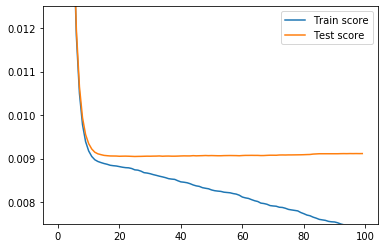

In [6]:
results = model_scores.evals_result()
epochs = len(results['validation_0']['brier-error'])
fig, ax = plt.subplots()
ax.plot(range(0, epochs), results['validation_0']['brier-error'], label='Train score')
ax.plot(range(0, epochs), results['validation_1']['brier-error'], label='Test score')
ax.set_ylim([0.0075, 0.0125])
ax.legend()
fig.show()

In [7]:
Y_pred['scores'] = model_scores.predict_proba(X_test)[:, 1]
print(f"  Brier score: %.6f" % brier_score_loss(Y_test['scores'], Y_pred['scores']))
print(f"  ROC AUC: %.4f" % roc_auc_score(Y_test['scores'], Y_pred['scores']))

  Brier score: 0.009115
  ROC AUC: 0.8137


In [10]:
model_scores1 = XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                             colsample_bytree=0.8, scale_pos_weight=1, verbosity=1, seed=42)
params1 = dict(n_estimators=range(50, 300, 50))
grid_search1 = GridSearchCV(model_scores1, params1, scoring='brier_score_loss', n_jobs=1, cv=cv, verbose=10,
                            return_train_score=True)
gs_results1 = grid_search1.fit(X_train, Y_train['scores'])
gs_results1.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, score=(train=-0.009, test=-0.009), total=  25.8s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.9s remaining:    0.0s


[CV]  n_estimators=50, score=(train=-0.009, test=-0.009), total=  26.7s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   55.0s remaining:    0.0s


[CV]  n_estimators=50, score=(train=-0.009, test=-0.009), total=  27.2s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


[CV]  n_estimators=50, score=(train=-0.009, test=-0.009), total=  27.0s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.9min remaining:    0.0s


[CV]  n_estimators=50, score=(train=-0.009, test=-0.009), total=  27.3s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s


[CV]  n_estimators=100, score=(train=-0.009, test=-0.009), total= 1.1min
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.4min remaining:    0.0s


[CV]  n_estimators=100, score=(train=-0.009, test=-0.009), total= 1.4min
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.8min remaining:    0.0s


[CV]  n_estimators=100, score=(train=-0.009, test=-0.009), total= 1.0min
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.9min remaining:    0.0s


[CV]  n_estimators=100, score=(train=-0.009, test=-0.009), total= 1.6min
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.6min remaining:    0.0s


[CV]  n_estimators=100, score=(train=-0.009, test=-0.009), total= 1.6min
[CV] n_estimators=150 ................................................
[CV]  n_estimators=150, score=(train=-0.009, test=-0.009), total= 2.3min
[CV] n_estimators=150 ................................................
[CV]  n_estimators=150, score=(train=-0.009, test=-0.009), total= 2.2min
[CV] n_estimators=150 ................................................
[CV]  n_estimators=150, score=(train=-0.009, test=-0.009), total= 2.4min
[CV] n_estimators=150 ................................................
[CV]  n_estimators=150, score=(train=-0.009, test=-0.009), total= 2.2min
[CV] n_estimators=150 ................................................
[CV]  n_estimators=150, score=(train=-0.009, test=-0.009), total= 2.3min
[CV] n_estimators=200 ................................................
[CV]  n_estimators=200, score=(train=-0.008, test=-0.009), total= 2.9min
[CV] n_estimators=200 .........................................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 39.6min finished


{'n_estimators': 200}

<ErrorbarContainer object of 3 artists>

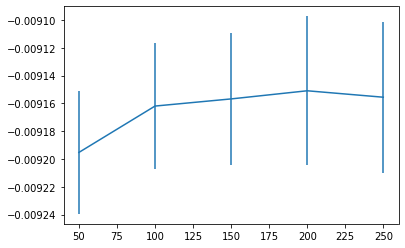

In [11]:
plt.errorbar(range(50, 300, 50), gs_results1.cv_results_['mean_test_score'], yerr=gs_results1.cv_results_['std_test_score'])

In [12]:
model_scores2 = XGBClassifier(learning_rate=0.1, n_estimators=200, gamma=0, subsample=0.8,
                              colsample_bytree=0.8, scale_pos_weight=1, verbosity=1, seed=42)
params2 = dict(max_depth=range(3, 8, 2), min_child_weight=range(1, 6, 2))
grid_search2 = GridSearchCV(model_scores2, params2, scoring='brier_score_loss', n_jobs=1, cv=cv, verbose=10,
                            return_train_score=True)
gs_results2 = grid_search2.fit(X_train, Y_train['scores'])
gs_results2.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, min_child_weight=1, score=(train=-0.009, test=-0.009), total= 1.6min
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  max_depth=3, min_child_weight=1, score=(train=-0.009, test=-0.009), total= 1.6min
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.3min remaining:    0.0s


[CV]  max_depth=3, min_child_weight=1, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.0min remaining:    0.0s


[CV]  max_depth=3, min_child_weight=1, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.8min remaining:    0.0s


[CV]  max_depth=3, min_child_weight=1, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=3 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.5min remaining:    0.0s


[CV]  max_depth=3, min_child_weight=3, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=3 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 10.2min remaining:    0.0s


[CV]  max_depth=3, min_child_weight=3, score=(train=-0.009, test=-0.009), total= 1.6min
[CV] max_depth=3, min_child_weight=3 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 11.9min remaining:    0.0s


[CV]  max_depth=3, min_child_weight=3, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=3 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 13.6min remaining:    0.0s


[CV]  max_depth=3, min_child_weight=3, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=3 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 15.3min remaining:    0.0s


[CV]  max_depth=3, min_child_weight=3, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=5 .................................
[CV]  max_depth=3, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=5 .................................
[CV]  max_depth=3, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.6min
[CV] max_depth=3, min_child_weight=5 .................................
[CV]  max_depth=3, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=5 .................................
[CV]  max_depth=3, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=3, min_child_weight=5 .................................
[CV]  max_depth=3, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.7min
[CV] max_depth=5, min_child_weight=1 .................................
[CV]  max_depth=5, min_child_weight=1, score=(

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 102.2min finished


{'max_depth': 5, 'min_child_weight': 5}

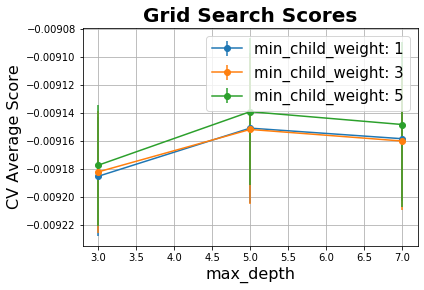

In [13]:
fig, ax = plot_grid_search(gs_results2.cv_results_)

In [20]:
model_scores3 = XGBClassifier(learning_rate=0.1, n_estimators=200, gamma=0, subsample=0.8,
                              colsample_bytree=0.8, scale_pos_weight=1, verbosity=1, seed=42)
params3 = dict(max_depth=[4, 5, 6], min_child_weight=[4, 5, 6])
grid_search3 = GridSearchCV(model_scores3, params3, scoring='brier_score_loss', n_jobs=1, cv=cv, verbose=10,
                            return_train_score=True)
gs_results3 = grid_search3.fit(X_train, Y_train['scores'])
gs_results3.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=4, min_child_weight=4 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_child_weight=4, score=(train=-0.009, test=-0.009), total= 1.5min
[CV] max_depth=4, min_child_weight=4 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=4, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=4 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=4, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=4 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.0min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=4, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=4 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.3min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=4, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=5 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.5min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=5 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.8min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=5 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  9.0min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=5 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 10.3min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=5 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.5min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=5, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=6 .................................
[CV]  max_depth=4, min_child_weight=6, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=6 .................................
[CV]  max_depth=4, min_child_weight=6, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=6 .................................
[CV]  max_depth=4, min_child_weight=6, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=6 .................................
[CV]  max_depth=4, min_child_weight=6, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=4, min_child_weight=6 .................................
[CV]  max_depth=4, min_child_weight=6, score=(train=-0.009, test=-0.009), total= 1.2min
[CV] max_depth=5, min_child_weight=4 .................................
[CV]  max_depth=5, min_child_weight=4, score=(

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 68.5min finished


{'max_depth': 6, 'min_child_weight': 6}

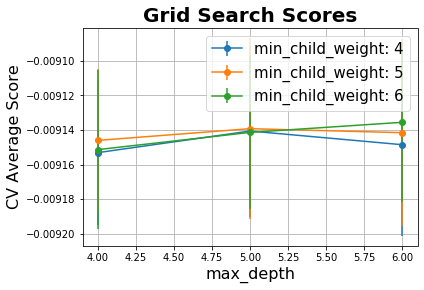

In [21]:
fig, ax = plot_grid_search(gs_results3.cv_results_)

In [28]:
model_scores4 = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=6, min_child_weight=6,
                              subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1, verbosity=1, seed=42)
params4 = dict(gamma=[0, 0.1, 0.2, 0.3, 0.4, 0.5])
grid_search4 = GridSearchCV(model_scores4, params4, scoring='brier_score_loss', n_jobs=1, cv=cv, verbose=10,
                            return_train_score=True)
gs_results4 = grid_search4.fit(X_train, Y_train['scores'])
gs_results4.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] gamma=0 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... gamma=0, score=(train=-0.008, test=-0.009), total= 2.6min
[CV] gamma=0 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] ....... gamma=0, score=(train=-0.008, test=-0.009), total= 2.6min
[CV] gamma=0 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.3min remaining:    0.0s


[CV] ....... gamma=0, score=(train=-0.008, test=-0.009), total= 2.6min
[CV] gamma=0 .........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.9min remaining:    0.0s


[CV] ....... gamma=0, score=(train=-0.008, test=-0.009), total= 2.9min
[CV] gamma=0 .........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 10.8min remaining:    0.0s


[CV] ....... gamma=0, score=(train=-0.008, test=-0.009), total= 2.8min
[CV] gamma=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.7min remaining:    0.0s


[CV] ..... gamma=0.1, score=(train=-0.008, test=-0.009), total= 2.7min
[CV] gamma=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 16.4min remaining:    0.0s


[CV] ..... gamma=0.1, score=(train=-0.008, test=-0.009), total= 2.8min
[CV] gamma=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 19.3min remaining:    0.0s


[CV] ..... gamma=0.1, score=(train=-0.008, test=-0.009), total= 2.7min
[CV] gamma=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 22.1min remaining:    0.0s


[CV] ..... gamma=0.1, score=(train=-0.008, test=-0.009), total= 2.7min
[CV] gamma=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 24.8min remaining:    0.0s


[CV] ..... gamma=0.1, score=(train=-0.008, test=-0.009), total= 2.0min
[CV] gamma=0.2 .......................................................
[CV] ..... gamma=0.2, score=(train=-0.008, test=-0.009), total= 1.8min
[CV] gamma=0.2 .......................................................
[CV] ..... gamma=0.2, score=(train=-0.008, test=-0.009), total= 1.7min
[CV] gamma=0.2 .......................................................
[CV] ..... gamma=0.2, score=(train=-0.008, test=-0.009), total= 1.8min
[CV] gamma=0.2 .......................................................
[CV] ..... gamma=0.2, score=(train=-0.008, test=-0.009), total= 1.8min
[CV] gamma=0.2 .......................................................
[CV] ..... gamma=0.2, score=(train=-0.008, test=-0.009), total= 1.8min
[CV] gamma=0.3 .......................................................
[CV] ..... gamma=0.3, score=(train=-0.008, test=-0.009), total= 1.8min
[CV] gamma=0.3 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 62.7min finished


{'gamma': 0}

<ErrorbarContainer object of 3 artists>

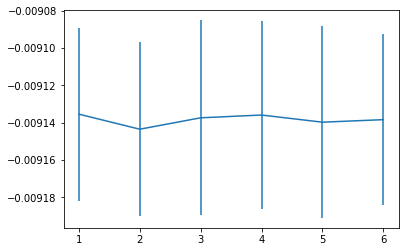

In [29]:
plt.errorbar(range(1, 7),
             gs_results4.cv_results_['mean_test_score'],
             yerr=gs_results4.cv_results_['std_test_score'])

In [31]:
model_scores5 = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=6, min_child_weight=6, gamma=0,
                              scale_pos_weight=1, verbosity=1, seed=42)
params5 = dict(subsample = [0.4, 0.6, 0.8, 1], colsample_by_tree=[0.4, 0.6, 0.8, 1])
grid_search5 = GridSearchCV(model_scores5, params5, scoring='brier_score_loss', n_jobs=1, cv=cv, verbose=10,
                            return_train_score=True)
gs_results5 = grid_search5.fit(X_train, Y_train['scores'])
gs_results5.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] colsample_by_tree=0.4, subsample=0.4 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_by_tree=0.4, subsample=0.4, score=(train=-0.008, test=-0.009), total= 2.7min
[CV] colsample_by_tree=0.4, subsample=0.4 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV]  colsample_by_tree=0.4, subsample=0.4, score=(train=-0.008, test=-0.009), total= 2.6min
[CV] colsample_by_tree=0.4, subsample=0.4 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.4min remaining:    0.0s


[CV]  colsample_by_tree=0.4, subsample=0.4, score=(train=-0.008, test=-0.009), total= 2.6min
[CV] colsample_by_tree=0.4, subsample=0.4 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.0min remaining:    0.0s


[CV]  colsample_by_tree=0.4, subsample=0.4, score=(train=-0.008, test=-0.009), total= 2.6min
[CV] colsample_by_tree=0.4, subsample=0.4 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 10.6min remaining:    0.0s


[CV]  colsample_by_tree=0.4, subsample=0.4, score=(train=-0.008, test=-0.009), total= 2.6min
[CV] colsample_by_tree=0.4, subsample=0.6 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.3min remaining:    0.0s


[CV]  colsample_by_tree=0.4, subsample=0.6, score=(train=-0.008, test=-0.009), total= 3.0min
[CV] colsample_by_tree=0.4, subsample=0.6 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 16.3min remaining:    0.0s


[CV]  colsample_by_tree=0.4, subsample=0.6, score=(train=-0.008, test=-0.009), total= 2.9min
[CV] colsample_by_tree=0.4, subsample=0.6 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 19.2min remaining:    0.0s


[CV]  colsample_by_tree=0.4, subsample=0.6, score=(train=-0.008, test=-0.009), total=18.0min
[CV] colsample_by_tree=0.4, subsample=0.6 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 37.3min remaining:    0.0s


[CV]  colsample_by_tree=0.4, subsample=0.6, score=(train=-0.008, test=-0.009), total= 3.2min
[CV] colsample_by_tree=0.4, subsample=0.6 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 40.6min remaining:    0.0s


[CV]  colsample_by_tree=0.4, subsample=0.6, score=(train=-0.008, test=-0.009), total= 3.7min
[CV] colsample_by_tree=0.4, subsample=0.8 ............................
[CV]  colsample_by_tree=0.4, subsample=0.8, score=(train=-0.008, test=-0.009), total= 3.3min
[CV] colsample_by_tree=0.4, subsample=0.8 ............................
[CV]  colsample_by_tree=0.4, subsample=0.8, score=(train=-0.008, test=-0.009), total= 3.1min
[CV] colsample_by_tree=0.4, subsample=0.8 ............................
[CV]  colsample_by_tree=0.4, subsample=0.8, score=(train=-0.008, test=-0.009), total= 3.1min
[CV] colsample_by_tree=0.4, subsample=0.8 ............................
[CV]  colsample_by_tree=0.4, subsample=0.8, score=(train=-0.008, test=-0.009), total= 3.1min
[CV] colsample_by_tree=0.4, subsample=0.8 ............................
[CV]  colsample_by_tree=0.4, subsample=0.8, score=(train=-0.008, test=-0.009), total= 3.1min
[CV] colsample_by_tree=0.4, subsample=1 ..............................
[CV]  colsample_

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 251.7min finished


{'colsample_by_tree': 0.4, 'subsample': 1}

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f18a58f0490>)

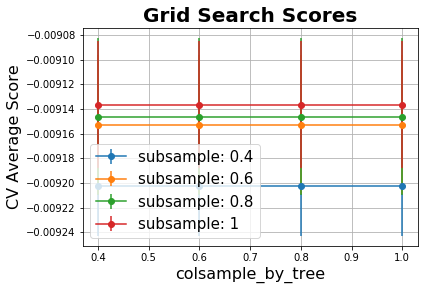

In [32]:
plot_grid_search(gs_results5.cv_results_)

In [34]:
model_scores6 = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=6, min_child_weight=6, gamma=0,
                              subsample=1, colsample_bytree=0.4, scale_pos_weight=1, verbosity=1, seed=42)
params6 = dict(reg_lambda=[0, 1e-2, 1e-1, 1, 10], reg_alpha=[0, 1e-2, 1e-1, 1, 10])
grid_search6 = GridSearchCV(model_scores6, params6, scoring='brier_score_loss', n_jobs=1, cv=cv, verbose=10,
                            return_train_score=True)
gs_results6 = grid_search6.fit(X_train, Y_train['scores'])
gs_results6.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] reg_alpha=0, reg_lambda=0 .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_alpha=0, reg_lambda=0, score=(train=-0.008, test=-0.009), total= 1.1min
[CV] reg_alpha=0, reg_lambda=0 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  reg_alpha=0, reg_lambda=0, score=(train=-0.008, test=-0.009), total= 1.1min
[CV] reg_alpha=0, reg_lambda=0 .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s


[CV]  reg_alpha=0, reg_lambda=0, score=(train=-0.008, test=-0.009), total= 1.1min
[CV] reg_alpha=0, reg_lambda=0 .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.4min remaining:    0.0s


[CV]  reg_alpha=0, reg_lambda=0, score=(train=-0.008, test=-0.009), total= 1.1min
[CV] reg_alpha=0, reg_lambda=0 .......................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.6min remaining:    0.0s


[CV]  reg_alpha=0, reg_lambda=0, score=(train=-0.008, test=-0.009), total= 1.5min
[CV] reg_alpha=0, reg_lambda=0.01 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.1min remaining:    0.0s


[CV]  reg_alpha=0, reg_lambda=0.01, score=(train=-0.008, test=-0.009), total= 1.9min
[CV] reg_alpha=0, reg_lambda=0.01 ....................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  8.0min remaining:    0.0s


[CV]  reg_alpha=0, reg_lambda=0.01, score=(train=-0.008, test=-0.009), total= 1.5min
[CV] reg_alpha=0, reg_lambda=0.01 ....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  9.6min remaining:    0.0s


[CV]  reg_alpha=0, reg_lambda=0.01, score=(train=-0.008, test=-0.009), total= 1.8min
[CV] reg_alpha=0, reg_lambda=0.01 ....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 11.4min remaining:    0.0s


[CV]  reg_alpha=0, reg_lambda=0.01, score=(train=-0.008, test=-0.009), total= 1.7min
[CV] reg_alpha=0, reg_lambda=0.01 ....................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 13.1min remaining:    0.0s


[CV]  reg_alpha=0, reg_lambda=0.01, score=(train=-0.008, test=-0.009), total= 1.7min
[CV] reg_alpha=0, reg_lambda=0.1 .....................................
[CV]  reg_alpha=0, reg_lambda=0.1, score=(train=-0.008, test=-0.009), total= 1.7min
[CV] reg_alpha=0, reg_lambda=0.1 .....................................
[CV]  reg_alpha=0, reg_lambda=0.1, score=(train=-0.008, test=-0.009), total= 1.7min
[CV] reg_alpha=0, reg_lambda=0.1 .....................................
[CV]  reg_alpha=0, reg_lambda=0.1, score=(train=-0.008, test=-0.009), total= 1.8min
[CV] reg_alpha=0, reg_lambda=0.1 .....................................
[CV]  reg_alpha=0, reg_lambda=0.1, score=(train=-0.008, test=-0.009), total= 1.9min
[CV] reg_alpha=0, reg_lambda=0.1 .....................................
[CV]  reg_alpha=0, reg_lambda=0.1, score=(train=-0.008, test=-0.009), total= 2.0min
[CV] reg_alpha=0, reg_lambda=1 .......................................
[CV]  reg_alpha=0, reg_lambda=1, score=(train=-0.008, test=-0.009), t

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 170.8min finished


{'reg_alpha': 0, 'reg_lambda': 1}

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f18e88271d0>)

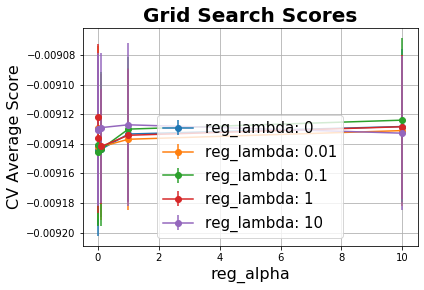

In [35]:
plot_grid_search(gs_results6.cv_results_)

In [37]:
model_scores7 = XGBClassifier(max_depth=6, min_child_weight=6, gamma=0, reg_lambda=1, reg_alpha=0,
                              subsample=1, colsample_bytree=0.4, scale_pos_weight=1, verbosity=1, seed=42)
params7 = dict(learning_rate=[0.01, 0.05, 0.1],
                n_estimators=[200, 500, 1000, 2500])
grid_search7 = GridSearchCV(model_scores7, params7, scoring='brier_score_loss', n_jobs=1, cv=cv, verbose=10,
                             return_train_score=True)
gs_results7 = grid_search7.fit(X_train, Y_train['scores'])
gs_results7.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=200, score=(train=-0.013, test=-0.014), total= 1.0min
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=200, score=(train=-0.013, test=-0.014), total=  57.2s
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.0min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=200, score=(train=-0.013, test=-0.014), total= 1.0min
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=200, score=(train=-0.013, test=-0.014), total=  59.9s
[CV] learning_rate=0.01, n_estimators=200 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.1min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=200, score=(train=-0.013, test=-0.014), total= 1.0min
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.2min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=500, score=(train=-0.009, test=-0.009), total= 2.6min
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.8min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=500, score=(train=-0.009, test=-0.009), total= 2.4min
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 10.2min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=500, score=(train=-0.009, test=-0.009), total= 2.6min
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 12.9min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=500, score=(train=-0.009, test=-0.009), total= 2.6min
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 15.5min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=500, score=(train=-0.009, test=-0.009), total= 2.6min
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV]  learning_rate=0.01, n_estimators=1000, score=(train=-0.009, test=-0.009), total= 5.1min
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV]  learning_rate=0.01, n_estimators=1000, score=(train=-0.009, test=-0.009), total= 4.8min
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV]  learning_rate=0.01, n_estimators=1000, score=(train=-0.009, test=-0.009), total= 5.1min
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV]  learning_rate=0.01, n_estimators=1000, score=(train=-0.009, test=-0.009), total= 7.6min
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV]  learning_rate=0.01, n_estimators=1000, score=(train=-0.009, test=-0.009), total= 8.1min
[CV] learning_rate=0.01, n_estimators=2500 ...........................
[CV]  learn

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 362.7min finished


{'learning_rate': 0.01, 'n_estimators': 2500}

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f174030ce10>)

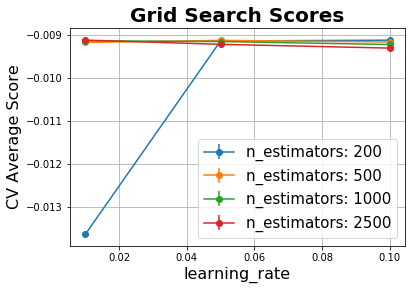

In [39]:
plot_grid_search(gs_results7.cv_results_)

In [40]:
model_scores_final = XGBClassifier(obj=brier_obj_sklearn,
                                   learning_rate=0.01, n_estimators=2500, max_depth=6, min_child_weight=6,
                                   gamma=0, reg_lambda=1, reg_alpha=0, subsample=1, colsample_bytree=0.4,
                                   scale_pos_weight=1, verbosity=1, seed=42, disable_default_eval_metric=1)
model_scores_final.fit(X_train, Y_train['scores'],
                       eval_metric=brier_score_sklearn,
                       eval_set=[(X_train, Y_train['scores']), (X_test, Y_test['scores'])],
                       verbose=True,
                       early_stopping_rounds=100)

[0]	validation_0-brier-error:0.24521	validation_1-brier-error:0.24521
Multiple eval metrics have been passed: 'validation_1-brier-error' will be used for early stopping.

Will train until validation_1-brier-error hasn't improved in 100 rounds.
[1]	validation_0-brier-error:0.24052	validation_1-brier-error:0.24052
[2]	validation_0-brier-error:0.23592	validation_1-brier-error:0.23592
[3]	validation_0-brier-error:0.23141	validation_1-brier-error:0.23141
[4]	validation_0-brier-error:0.22700	validation_1-brier-error:0.22699
[5]	validation_0-brier-error:0.22267	validation_1-brier-error:0.22266
[6]	validation_0-brier-error:0.21843	validation_1-brier-error:0.21842
[7]	validation_0-brier-error:0.21427	validation_1-brier-error:0.21426
[8]	validation_0-brier-error:0.21019	validation_1-brier-error:0.21019
[9]	validation_0-brier-error:0.20620	validation_1-brier-error:0.20619
[10]	validation_0-brier-error:0.20228	validation_1-brier-error:0.20227
[11]	validation_0-brier-error:0.19844	validation_1-brie

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              disable_default_eval_metric=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=2500, n_jobs=0, num_parallel_tree=1,
              obj=<function brier_obj_sklearn at 0x7f18b3860560>,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=1)

In [41]:
Y_pred['scores'] = model_scores_final.predict_proba(X_test)[:, 1]
print(f"  Brier score: %.6f" % brier_score_loss(Y_test['scores'], Y_pred['scores']))
print(f"  ROC AUC: %.4f" % roc_auc_score(Y_test['scores'], Y_pred['scores']))

  Brier score: 0.009001
  ROC AUC: 0.8266


/home/kuba/anaconda3/envs/the-value-of-line-breaking-pass/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


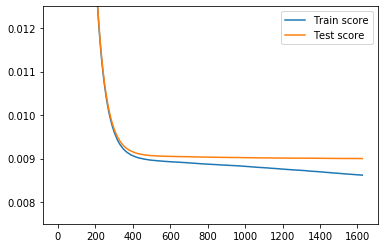

In [44]:
results = model_scores_final.evals_result()
epochs = len(results['validation_0']['brier-error'])
fig, ax = plt.subplots()
ax.plot(range(0, epochs), results['validation_0']['brier-error'], label='Train score')
ax.plot(range(0, epochs), results['validation_1']['brier-error'], label='Test score')
ax.set_ylim(0.0075, 0.0125)
ax.legend()
fig.show()

In [50]:
pickle.dump(model_scores_final, open('model_scores.pkl', 'wb'))